In [3]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
df = pd.read_csv('breast-cancer.csv')

In [8]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
x = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1) #df inteiro menos id e diagnosis
y = df['diagnosis']

In [23]:
modelo = LogisticRegression(max_iter = 10000)

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [24]:
modelo.fit(x_treino,y_treino)

LogisticRegression(max_iter=10000)

In [26]:
y_previsto = modelo.predict(x_teste) 
"""
O que ele previu pelos dados do x_teste 
(e ele aprendeu a interpretar com o x_treino e y_treino)
O y_teste seria a resposta correta a se comparar
"""
y_previsto

array(['B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype=object)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

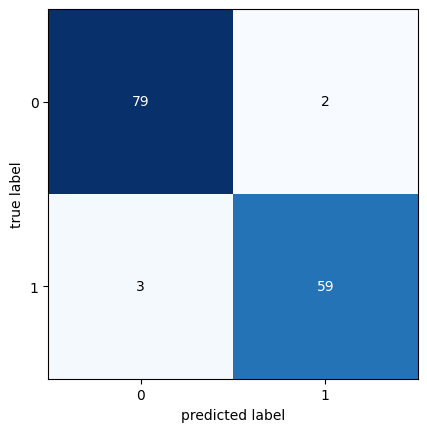

In [27]:
cm = confusion_matrix(y_previsto, y_teste)

plot_confusion_matrix(cm)

In [29]:
print(classification_report(y_previsto, y_teste))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97        81
           M       0.97      0.95      0.96        62

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

